In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

plt.rcParams["figure.figsize"] = (10,8)


In [4]:
df = pd.read_pickle('Datos/bikes_eda.pkl')

In [5]:
df.head(2)

,instant,dteday,year,month,weekday,workingday,weathersit,temp,windspeed,casual,registered,count_bikes
0,1,2018-01-01,0,1,6,0,2,14.110847,10.749882,331,654,985
1,2,2018-02-01,0,1,0,0,2,14.902598,16.652113,131,670,801


In [7]:
numericas = df.select_dtypes(include=np.number)

In [8]:
numericas.head(2)

,instant,temp,windspeed,casual,registered,count_bikes
0,1,14.110847,10.749882,331,654,985
1,2,14.902598,16.652113,131,670,801


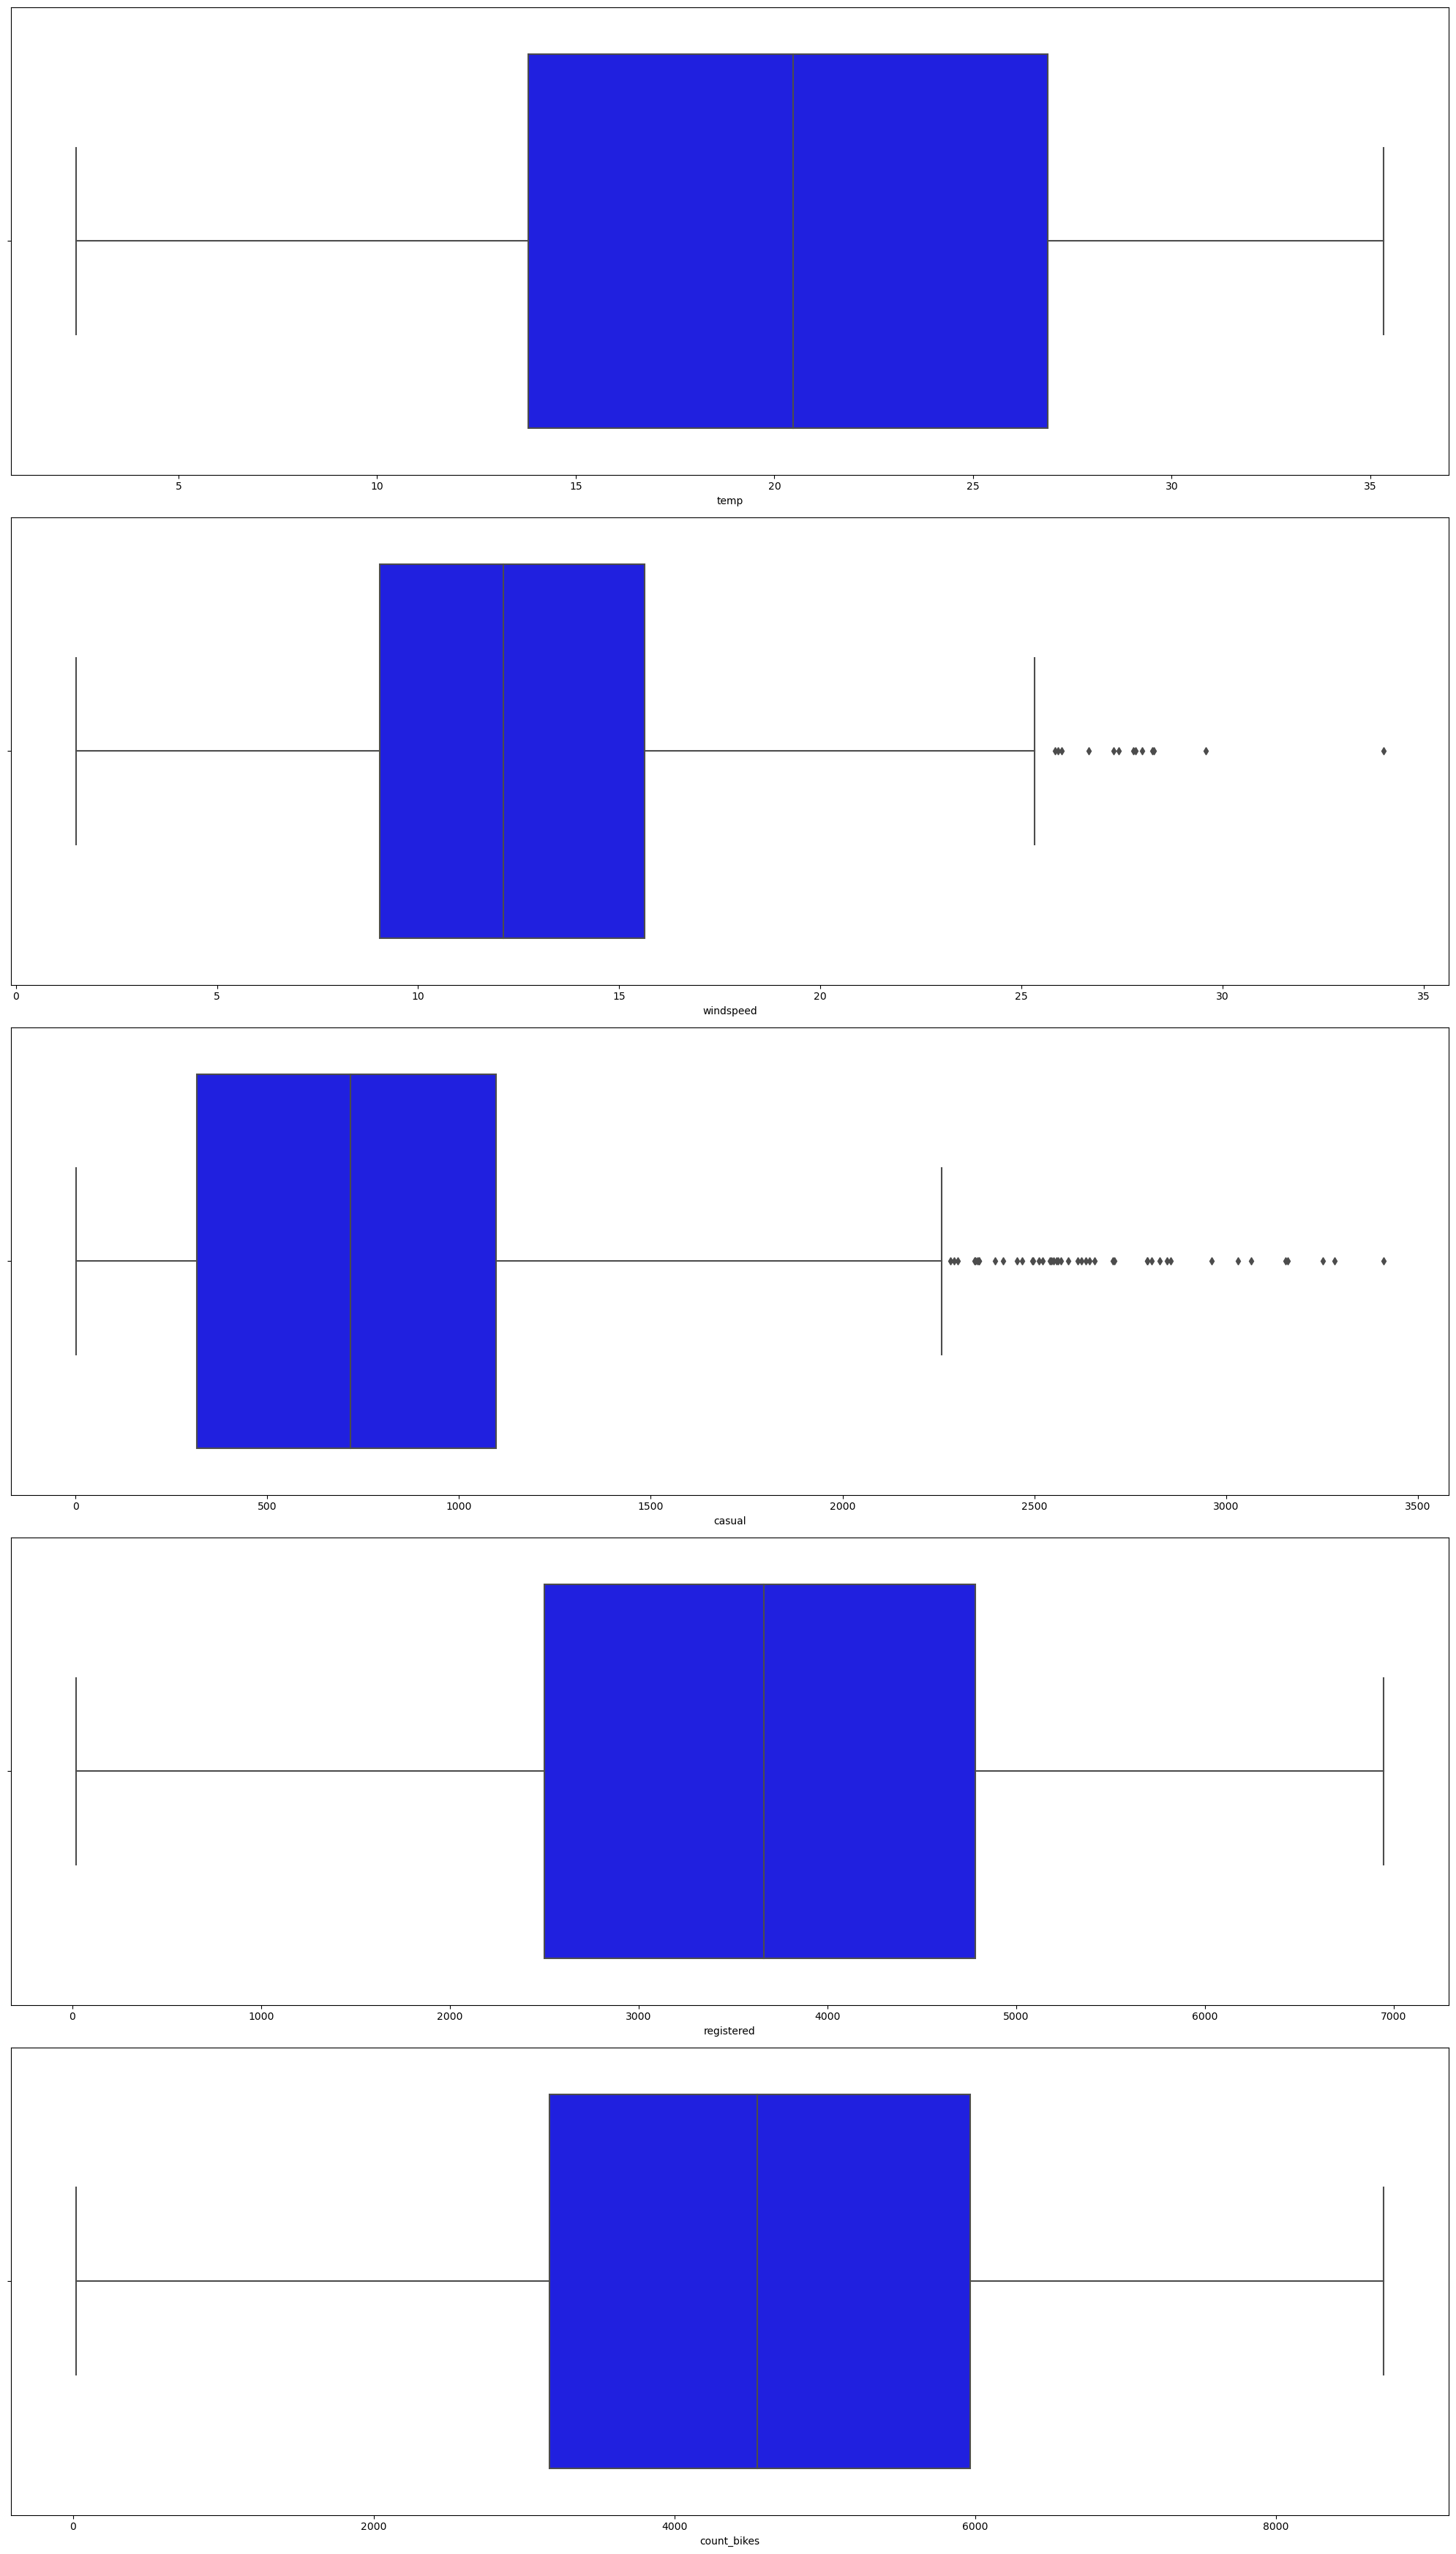

In [12]:
fig, axes = plt.subplots(5, 1, figsize=(20,35))

axes = axes.flat

columnas = numericas.drop('instant', axis=1).columns

for indice, columna in enumerate(columnas):
    sns.boxplot(x = df[columna], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad


plt.tight_layout()


plt.show() 

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,9))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_menores, ax=axes[indice], color = "aquamarine");
plt.tight_layout()
plt.show()

In [ ]:
# hemos eliminado los outliers para la columna respuesta, pero todavía tenemos algunis para la columna bmi
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices